In [4]:
#EDA on BIKE DETAILS DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


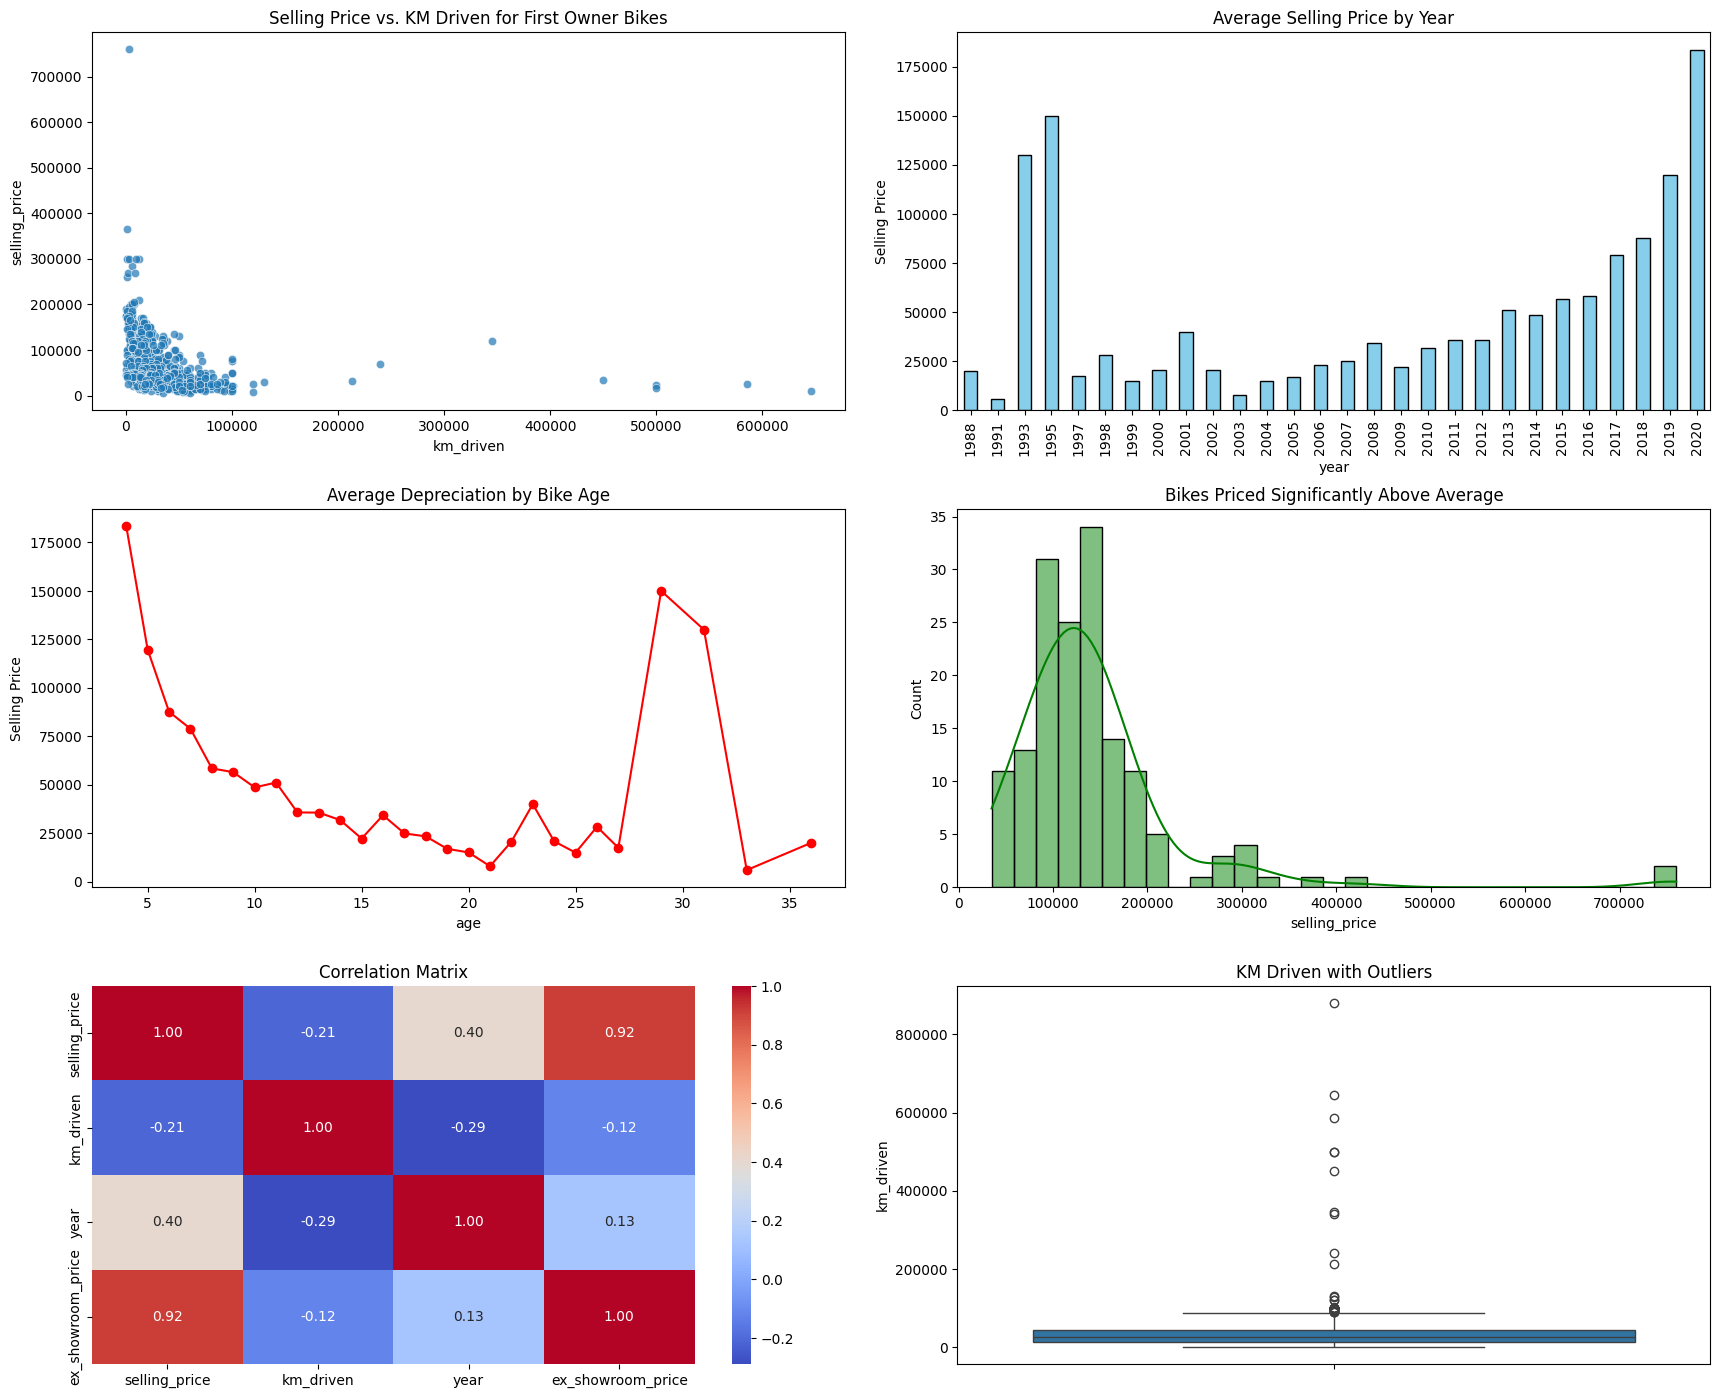

{'Significantly Above Average':                                     name  year  selling_price
 2    Royal Enfield Classic Gunmetal Grey  2018         150000
 7   Royal Enfield Bullet 350 [2007-2011]  2008         180000
 13                         Yamaha YZF R3  2019         365000
 18   Royal Enfield Classic Gunmetal Grey  2018         150000
 23                         Jawa Standard  2019         180000,
 'Correlation Matrix':                    selling_price  km_driven      year  ex_showroom_price
 selling_price           1.000000  -0.212937  0.402188           0.918583
 km_driven              -0.212937   1.000000 -0.288675          -0.122011
 year                    0.402188  -0.288675  1.000000           0.126378
 ex_showroom_price       0.918583  -0.122011  0.126378           1.000000,
 'IQR Range': (13500.0, 43000.0),
 'Removed Outliers Count': 39}

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'BIKE DETAILS.csv'
bike_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
bike_data.head(), bike_data.info()


# 1. Range of selling prices
selling_price_range = (bike_data['selling_price'].min(), bike_data['selling_price'].max())

# 2. Median selling price
median_selling_price = bike_data['selling_price'].median()

# 3. Most common seller type
most_common_seller_type = bike_data['seller_type'].value_counts().idxmax()

# 4. Number of bikes driven more than 50,000 km
bikes_over_50000_km = bike_data[bike_data['km_driven'] > 50000].shape[0]

# 5. Average km_driven for each ownership type
average_km_by_owner = bike_data.groupby('owner')['km_driven'].mean()

# 6. Proportion of bikes from the year 2015 or older
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
proportion_bikes_2015_or_older = bikes_2015_or_older / len(bike_data)

# 7. Missing values trend
missing_values_trend = bike_data.isnull().sum()

# 8. Highest ex_showroom_price and corresponding bike
highest_ex_showroom_price = bike_data['ex_showroom_price'].max()
bike_with_highest_price = bike_data.loc[bike_data['ex_showroom_price'].idxmax(), 'name']

# 9. Total number of bikes listed by each seller type
bikes_by_seller_type = bike_data['seller_type'].value_counts()

# Compile results
eda_results = {
    "Selling Price Range": selling_price_range,
    "Median Selling Price": median_selling_price,
    "Most Common Seller Type": most_common_seller_type,
    "Bikes Over 50,000 KM": bikes_over_50000_km,
    "Average KM by Owner": average_km_by_owner.to_dict(),
    "Proportion Bikes (2015 or Older)": proportion_bikes_2015_or_older,
    "Missing Values Trend": missing_values_trend.to_dict(),
    "Highest Ex-Showroom Price": highest_ex_showroom_price,
    "Bike with Highest Price": bike_with_highest_price,
    "Bikes by Seller Type": bikes_by_seller_type.to_dict()
}

eda_results


# Question 10: Relationship between selling_price and km_driven for first-owner bikes
first_owner_bikes = bike_data[bike_data['owner'] == '1st owner']

# Question 11: Removing outliers in km_driven using IQR
Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1
km_driven_no_outliers = bike_data[(bike_data['km_driven'] >= Q1 - 1.5 * IQR) &
                                  (bike_data['km_driven'] <= Q3 + 1.5 * IQR)]

# Question 12: Bivariate analysis of year and selling_price
avg_price_by_year = bike_data.groupby('year')['selling_price'].mean()

# Question 13: Average depreciation in selling price based on age
current_year = 2024
bike_data['age'] = current_year - bike_data['year']
avg_depreciation_by_age = bike_data.groupby('age')['selling_price'].mean()

# Question 14: Bikes priced significantly above the average for their year
avg_price_by_year_dict = bike_data.groupby('year')['selling_price'].mean().to_dict()
bike_data['avg_price_for_year'] = bike_data['year'].map(avg_price_by_year_dict)
significantly_above_avg = bike_data[bike_data['selling_price'] > bike_data['avg_price_for_year'] * 1.5]

# Question 15: Correlation matrix and heatmap
correlation_matrix = bike_data[['selling_price', 'km_driven', 'year', 'ex_showroom_price']].corr()

# Visualization setup
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
plt.tight_layout(pad=5.0)

# Visualization for question 10
sns.scatterplot(ax=axes[0, 0], data=first_owner_bikes, x='km_driven', y='selling_price', alpha=0.7)
axes[0, 0].set_title("Selling Price vs. KM Driven for First Owner Bikes")

# Visualization for question 12
avg_price_by_year.plot(ax=axes[0, 1], kind='bar', color='skyblue', edgecolor='black')
axes[0, 1].set_title("Average Selling Price by Year")
axes[0, 1].set_ylabel("Selling Price")

# Visualization for question 13
avg_depreciation_by_age.plot(ax=axes[1, 0], kind='line', color='red', marker='o')
axes[1, 0].set_title("Average Depreciation by Bike Age")
axes[1, 0].set_ylabel("Selling Price")

# Visualization for question 14
sns.histplot(ax=axes[1, 1], data=significantly_above_avg, x='selling_price', kde=True, color='green')
axes[1, 1].set_title("Bikes Priced Significantly Above Average")

# Visualization for question 15
sns.heatmap(ax=axes[2, 0], data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
axes[2, 0].set_title("Correlation Matrix")

# Removing outliers visualization for question 11
sns.boxplot(ax=axes[2, 1], data=bike_data, y='km_driven', showfliers=True)
axes[2, 1].set_title("KM Driven with Outliers")

plt.show()

# Summarize key outputs
summary_outputs = {
    "Significantly Above Average": significantly_above_avg[['name', 'year', 'selling_price']].head(),
    "Correlation Matrix": correlation_matrix,
    "IQR Range": (Q1, Q3),
    "Removed Outliers Count": len(bike_data) - len(km_driven_no_outliers)
}

summary_outputs


In [6]:
#EDA ON CAR SALE DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB
Dealer_Name
Buddy Storbeck's Diesel Service Inc                272

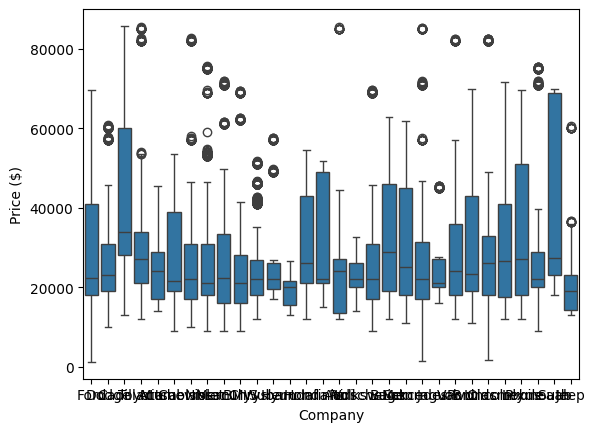

                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


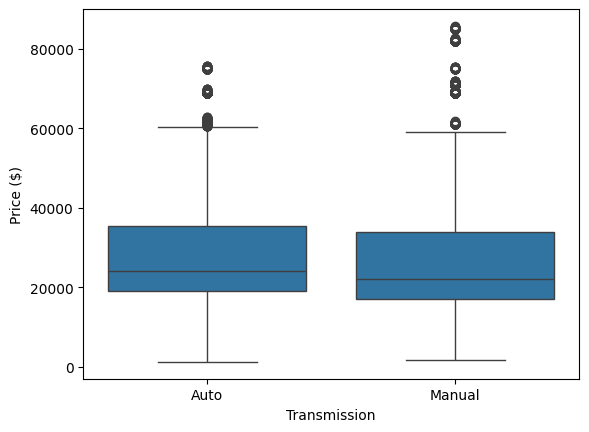

Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Mid

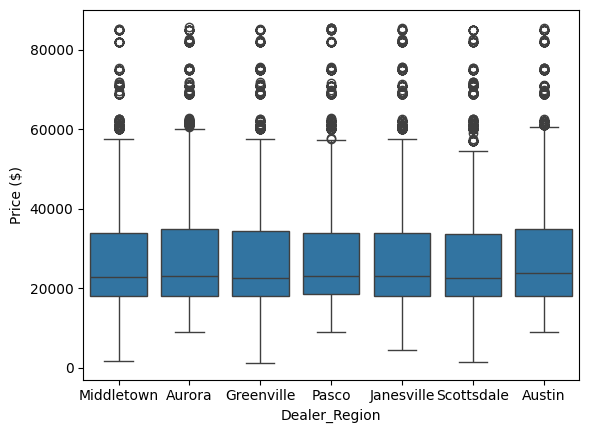

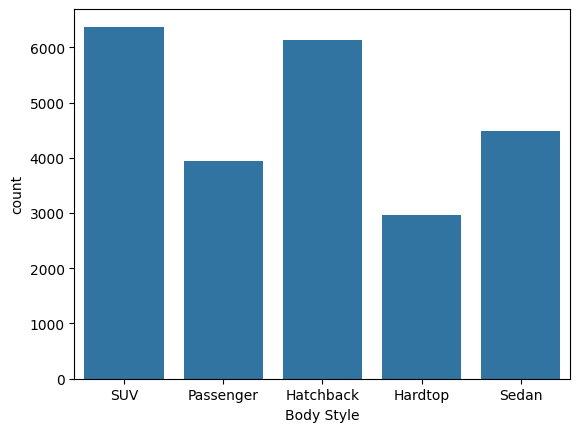

<ipython-input-7-b91b76d60270>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car_data, x='Dealer_Region', y='Price ($)', palette="Set3")


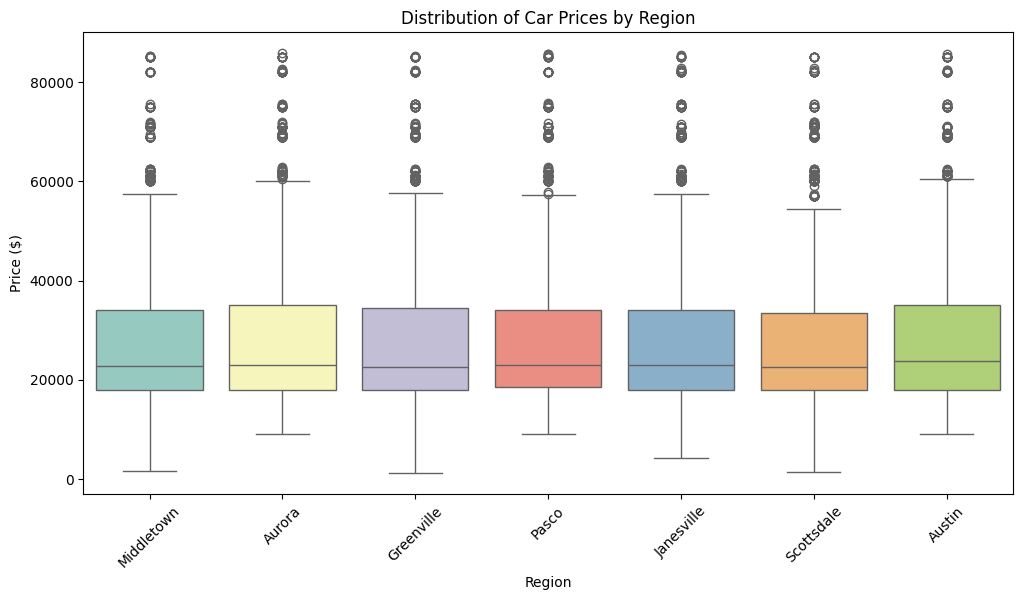

<ipython-input-7-b91b76d60270>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette="Set2")


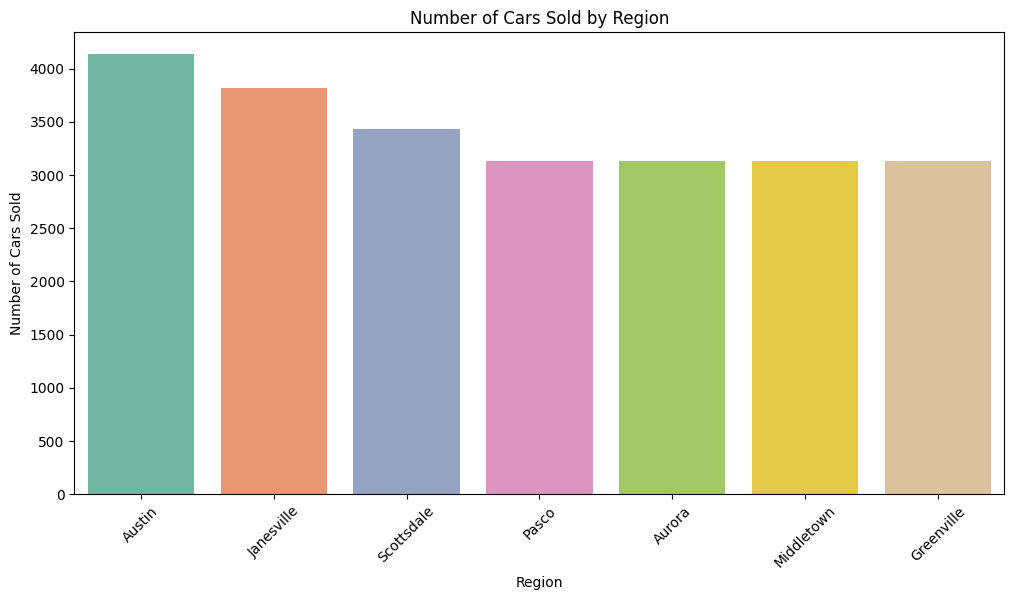

Income Bracket
High Income    28148.558531
Low Income     27884.297820
Name: Price ($), dtype: float64


<ipython-input-7-b91b76d60270>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_income_bracket.index, y=avg_price_by_income_bracket.values, palette="Set2")


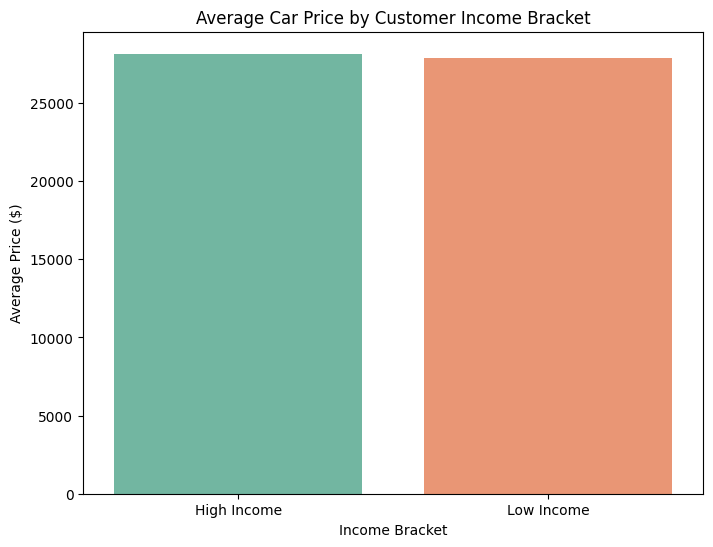

Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: Price ($), dtype: int64


<ipython-input-7-b91b76d60270>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Price ($)', data=top_5_df, palette="Set2")


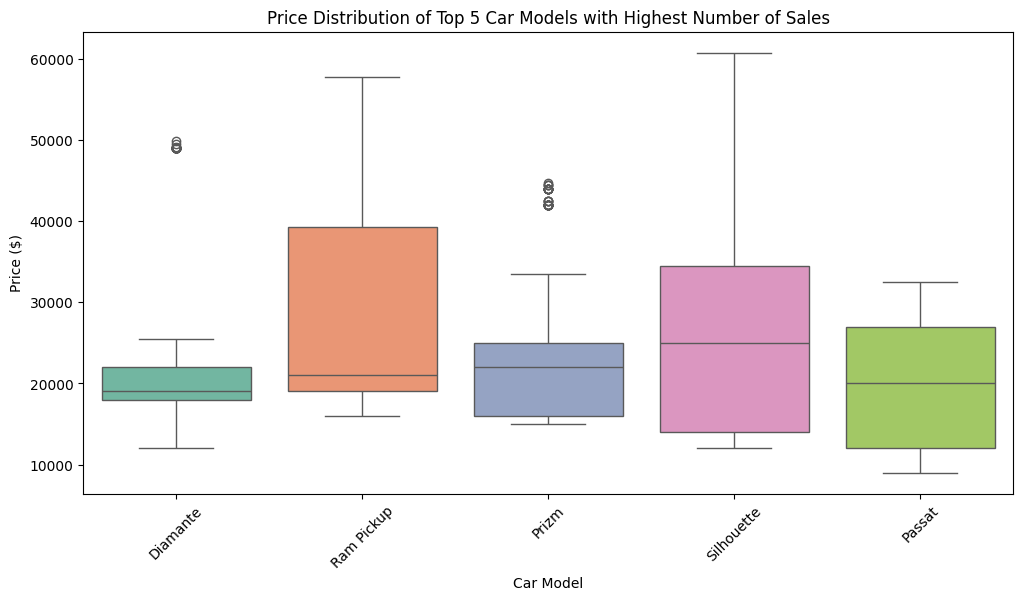

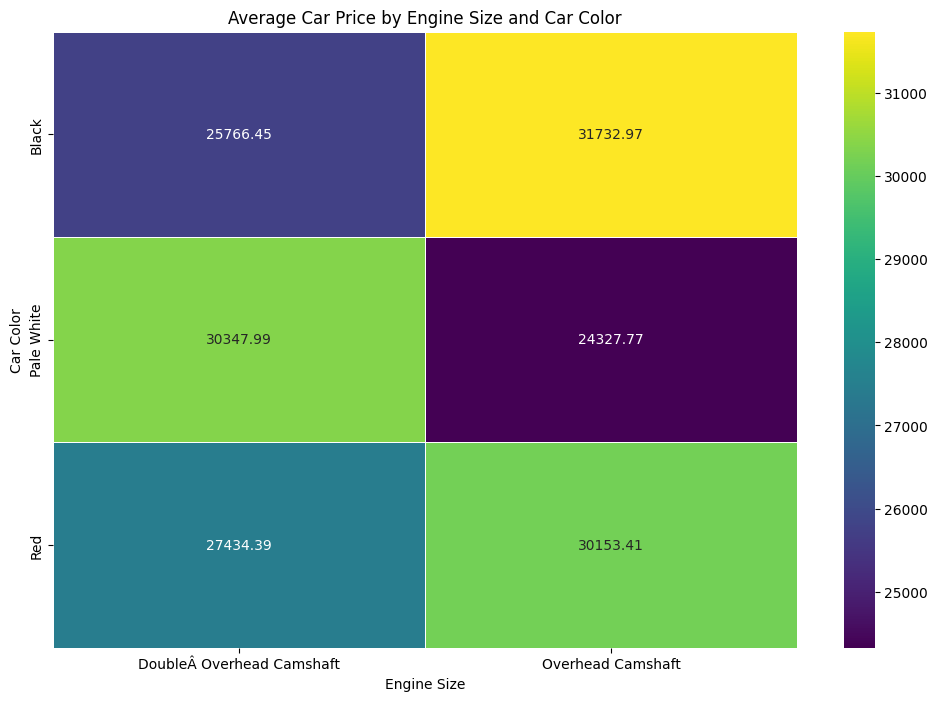

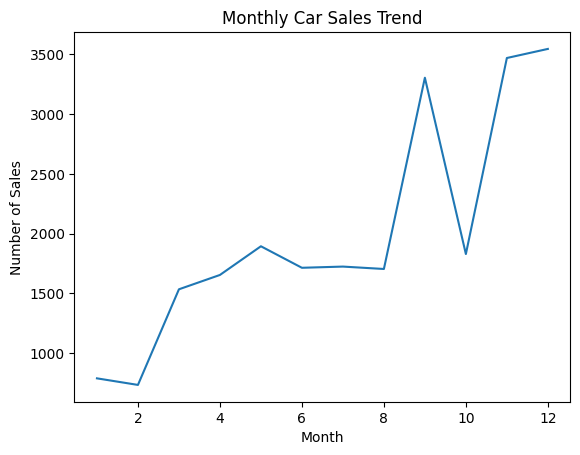

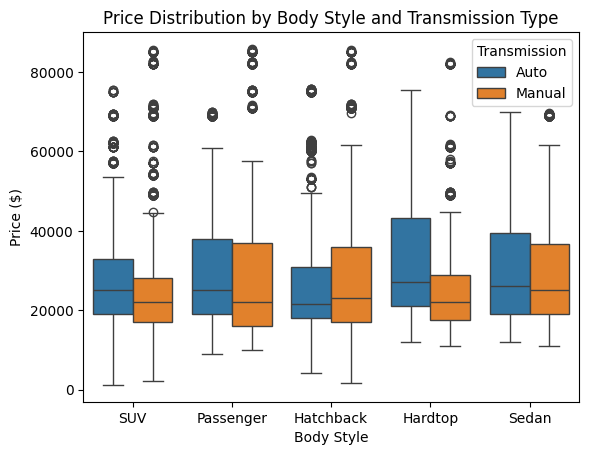

               Price ($)    Engine  Annual Income
Price ($)       1.000000 -0.011271       0.012065
Engine         -0.011271  1.000000      -0.006598
Annual Income   0.012065 -0.006598       1.000000
{'Average Selling Price by Dealer': Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                 

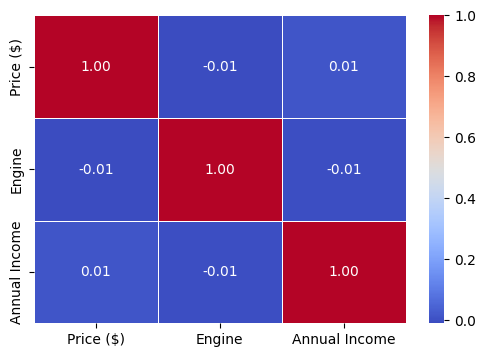

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
file_path = 'Car Sale.csv'
car_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
car_data.head(), car_data.info()

# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers
average_selling_price_by_dealer = car_data.groupby('Dealer_Name')['Price ($)'].mean()
print(average_selling_price_by_dealer)


# 2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends
car_brand_variation = car_data.groupby('Company')['Price ($)'].std()
print(car_brand_variation)
sns.boxplot(x='Company', y='Price ($)', data=car_data)
plt.show()


# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
car_prices_by_transmission = car_data.groupby('Transmission')['Price ($)'].describe()
print(car_prices_by_transmission)
sns.boxplot(x='Transmission', y='Price ($)', data=car_data)
plt.show()
interquartile_ranges = car_data.groupby('Transmission')['Price ($)'].apply(lambda x: x.quantile(0.75) - x.quantile(0.25))
print(interquartile_ranges)


# 4. What is the distribution of car prices across different regions
car_prices_by_region = car_data.groupby('Dealer_Region')['Price ($)'].describe()
print(car_prices_by_region)
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_data)
plt.show()


# 5. What is the distribution of cars based on body styles
car_distribution_by_body_style = car_data['Body Style'].value_counts()
sns.countplot(x='Body Style', data=car_data)
plt.show()


# 6. How does the average selling price of cars vary by customer gender and annual income
average_selling_price_by_gender_income = car_data.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()


# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region
#1.Distribution of car prices by region
plt.figure(figsize=(12, 6))
sns.boxplot(data=car_data, x='Dealer_Region', y='Price ($)', palette="Set3")
plt.title('Distribution of Car Prices by Region')
plt.ylabel('Price ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()
# 2. Number of cars sold by region
cars_sold_by_region = car_data['Dealer_Region'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette="Set2")
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()


# 8. How does the average car price differ between cars with different engine sizes
average_price_by_engine_size = car_data.groupby('Engine')['Price ($)'].mean()


# 9.How do car prices vary based on the customer’s annual income bracket
# Step 1: Create income brackets
def categorize_income(income):
    if income < 30000:
        return 'Low Income'
    else:
        return 'High Income'
car_data['Income Bracket'] = car_data['Annual Income'].apply(categorize_income)
avg_price_by_income_bracket = car_data.groupby('Income Bracket')['Price ($)'].mean()
print(avg_price_by_income_bracket)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_income_bracket.index, y=avg_price_by_income_bracket.values, palette="Set2")
plt.title('Average Car Price by Customer Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)')
plt.show()


# 10.What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_5_models = car_data.groupby('Model')['Price ($)'].count().nlargest(5)
print(top_5_models)
top_5_df = car_data[car_data['Model'].isin(top_5_models.index)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_df, palette="Set2")
plt.title('Price Distribution of Top 5 Car Models with Highest Number of Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation
price_by_color_engine = car_data.groupby(['Color', 'Engine'])['Price ($)'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(price_by_color_engine, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Average Car Price by Engine Size and Car Color')
plt.xlabel('Engine Size')
plt.ylabel('Car Color')
plt.show()


# 12. Is there any seasonal trend in car sales based on the date of sale
car_data['Date'] = pd.to_datetime(car_data['Date'])
car_data['Month'] = car_data['Date'].dt.month
monthly_sales = car_data.groupby('Month')['Model'].count()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


# 13. How does the car price distribution change when considering different combinations of body style and transmission type
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=car_data)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.show()


# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
car_data['Engine']=le.fit_transform(car_data['Engine'])
correlation_matrix = car_data[['Price ($)', 'Engine', 'Annual Income']].corr()
print(correlation_matrix)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)

# 15. How does the average car price vary across different car models and engine types?
avg_price_by_model_engine = car_data.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

#Compile result
eda_results = {
    "Average Selling Price by Dealer": average_selling_price_by_dealer,
    "car_brand_variation": car_brand_variation,
    "Distribution of Car Prices by Transmission": car_prices_by_transmission,
    "Distribution of Car Prices by Region": car_prices_by_region,
    "Distribution of Cars by Body Style": car_distribution_by_body_style,
    "Average Selling Price by Gender and Income": average_selling_price_by_gender_income,
    "Distribution of Car Prices by Region and Sold": cars_sold_by_region,
    "Average Price by Engine Size": average_price_by_engine_size,
    "Average Price by Income Bracket": avg_price_by_income_bracket,
    "Top 5 Car Models with Highest Sales": top_5_models,
    "Price Distribution of Top 5 Models": top_5_df,
    "Average Car Price by Engine Size and Color": price_by_color_engine,
    "Seasonal Trend in Car Sales": monthly_sales,
    "correlation_matrix": correlation_matrix,
    "Average Price by Model and Engine": avg_price_by_model_engine
}

print(eda_results)

In [8]:
#EDA ON AMAZON DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

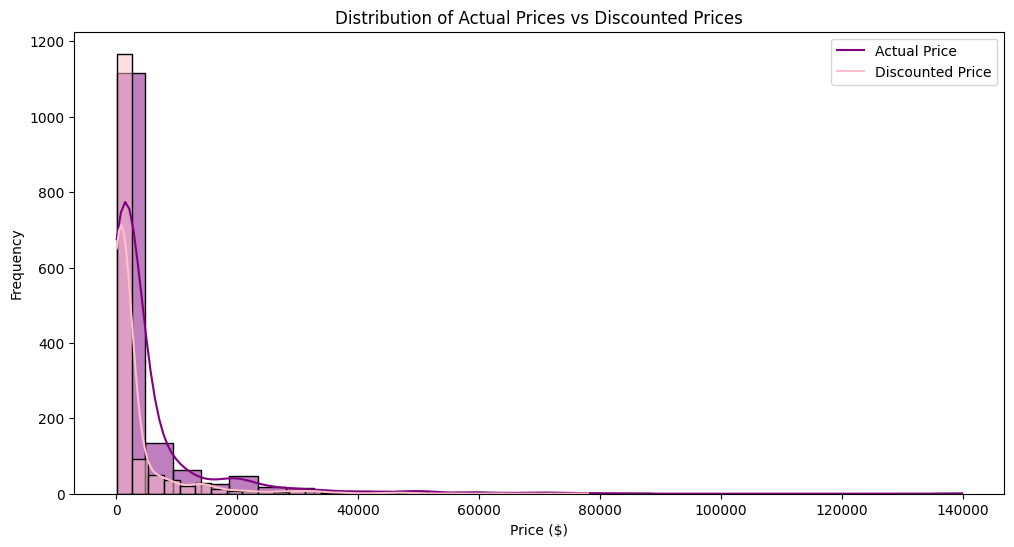

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

In [19]:
#load the dataset
file_path='amazon.csv'
amazon_data=pd.read_csv(file_path)

#Display the first few rows of the dataset to understand its structure
amazon_data.info()

# 1. What is the average rating for each product category
amazon_data['rating']=pd.to_numeric(amazon_data['rating'],errors='coerce')
print(amazon_data.groupby('category')['rating'].mean())


# 2. What are the top rating_count products by category
amazon_data['rating_count'] = pd.to_numeric(amazon_data['rating_count'], errors='coerce')
amazon_data['rating_count'] = amazon_data['rating_count'].fillna(amazon_data['rating_count'].mean())
top_products_by_category = amazon_data.loc[amazon_data.groupby('category')['rating_count'].idxmax()]
print(top_products_by_category[['category', 'product_name', 'rating_count']])


# 3. What is the distribution of discounted prices vs. actual prices
amazon_data['actual_price'] = amazon_data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amazon_data['discounted_price'] = amazon_data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
plt.figure(figsize=(12, 6))
sns.histplot(amazon_data['actual_price'], kde=True, color='purple', label='Actual Price', bins=30)
sns.histplot(amazon_data['discounted_price'], kde=True, color='pink', label='Discounted Price', bins=30)
plt.title('Distribution of Actual Prices vs Discounted Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.legend(labels=['Actual Price', 'Discounted Price'])
plt.show()


# 4. How does the average discount percentage vary across categories
amazon_data['discount_percentage']=amazon_data['discount_percentage'].str.replace('%','').astype(float)
avg_discount_percentage_by_category = amazon_data.groupby('category')['discount_percentage'].mean()
print(avg_discount_percentage_by_category)


# 5. What are the most popular product names
popular_products = amazon_data['product_name'].value_counts().head(10)
print(popular_products)


# 6. What are the most popular product keywords
amazon_data['keywords'] = amazon_data['product_name'].str.split(', ')
all_keywords = [keyword for sublist in amazon_data['keywords'] for keyword in sublist]
popular_keywords = pd.Series(all_keywords).value_counts().head(10)
print(popular_keywords)



# 7.What are the most popular product reviews
popular_reviews = amazon_data['rating'].value_counts().head(10)
print(popular_reviews)


# 8.What is the correlation between discounted_price and rating
correlation_discounted_rating = amazon_data['discounted_price'].corr(amazon_data['rating'])
print(correlation_discounted_rating)


# 9.What are the Top 5 categories based on the highest ratings
top_5_categories = amazon_data.groupby('category')['rating'].mean().nlargest(5)
print(top_5_categories)


# 10. Identify any potential areas for improvement or optimization based on the data analysis
'''To optimize your data, start by converting columns like `discounted_price`, `actual_price`, `rating`, and `rating_count`
into appropriate numeric types to facilitate easier analysis and calculations. You can enhance the dataset by creating new
features, such as the price difference between discounted and actual prices, and normalizing ratings for better comparison.
Textual columns like `product_name`, `review_content`, and `user_name` may be less valuable for quantitative analysis,
so consider summarizing or excluding them. Ensure data integrity by verifying consistency between related columns,
like `discounted_price` and `discount_percentage`, and address missing values in `rating_count`. Aggregating data by
product category or user behavior can uncover key insights, while indexing frequently queried columns will improve
performance for large datasets. These steps will streamline analysis, reduce redundancy, and support more efficient
querying and reporting. '''



In [20]:
#EDA ON SPOTIFY DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
27
None
Artist
Drake        17
Eminem       11
Flo Rida     10
Ludacris     10
Timbaland    10
Name: count, dtype: int64
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


<ipython-input-37-e2382d59e9af>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_popularity_by_artist.index, y=avg_popularity_by_artist.values, palette="Set2")
<ipython-input-37-e2382d59e9af>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data, x='Artist', y='Duration (ms)', palette="Set2")


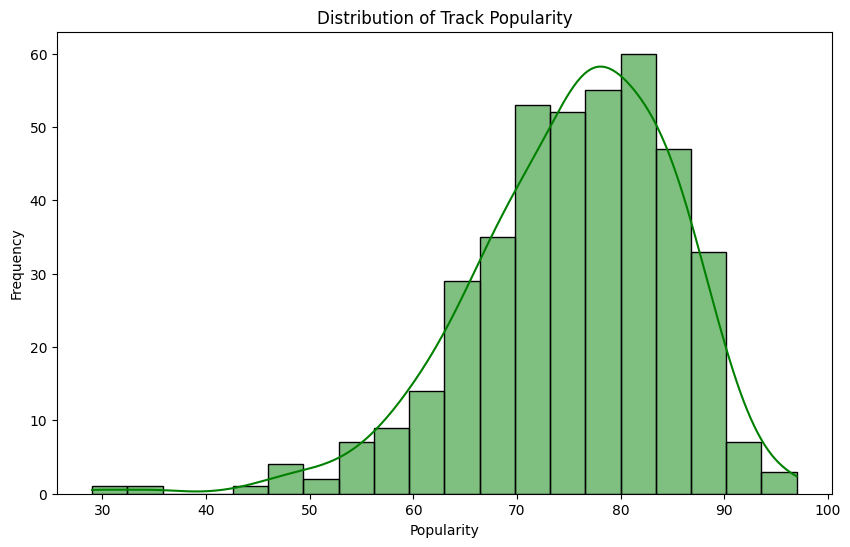

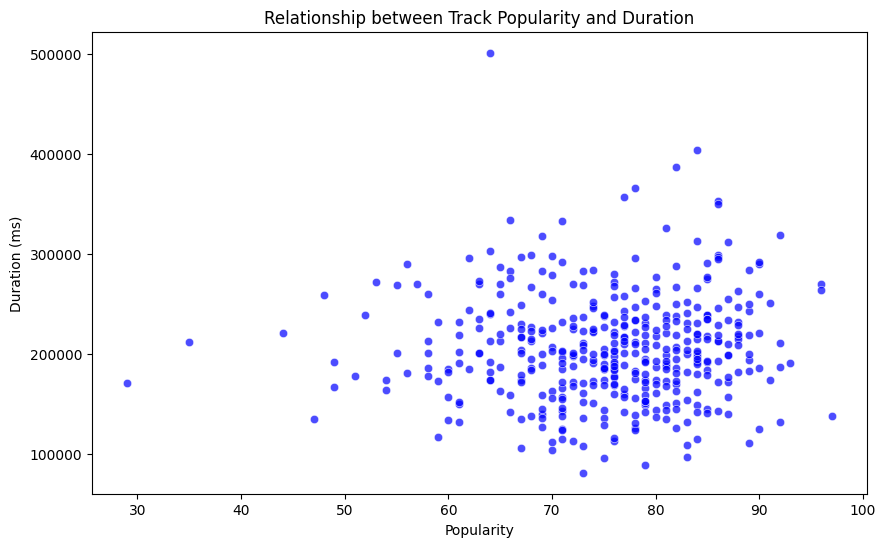

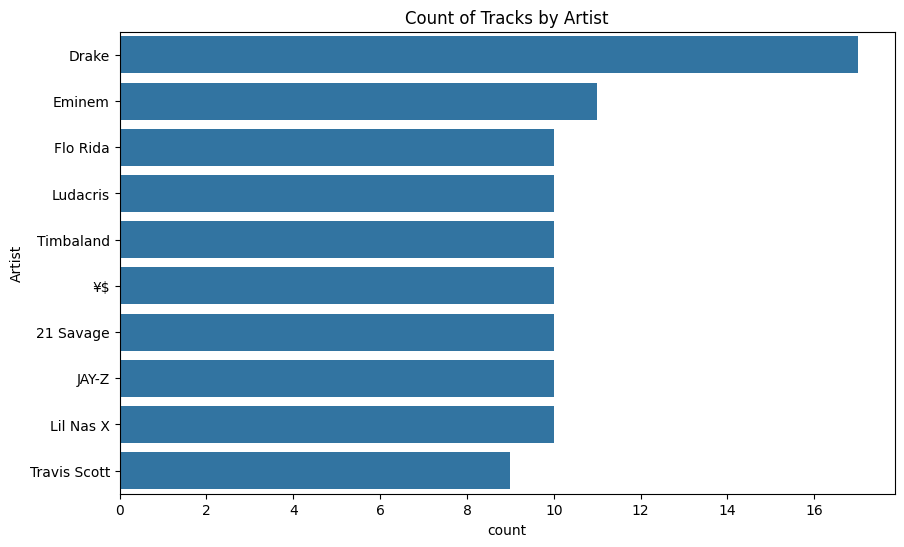

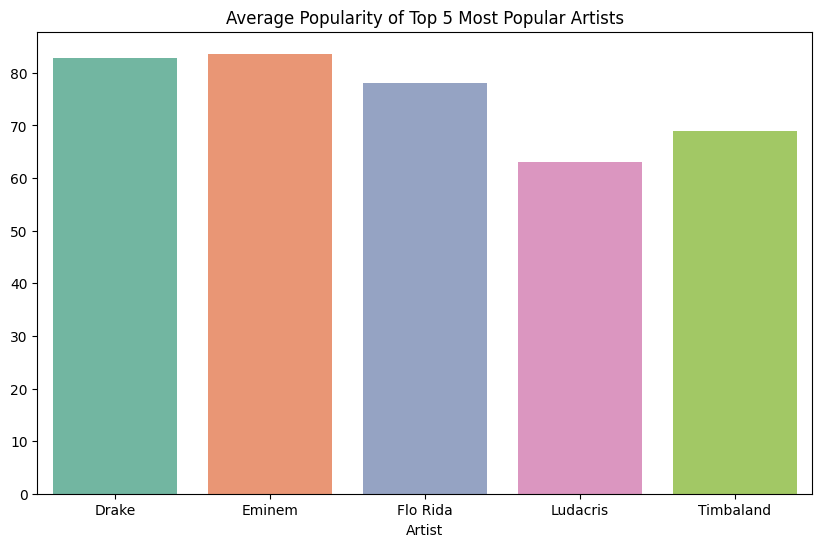

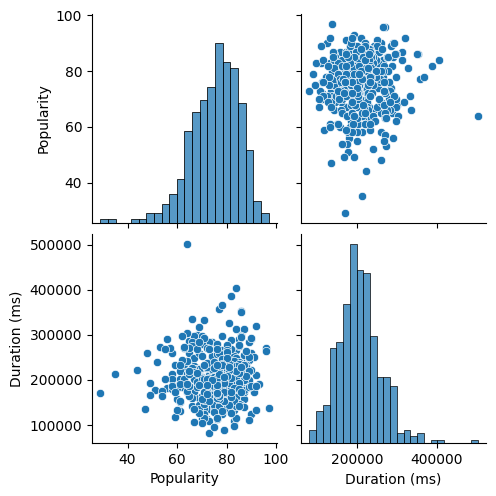

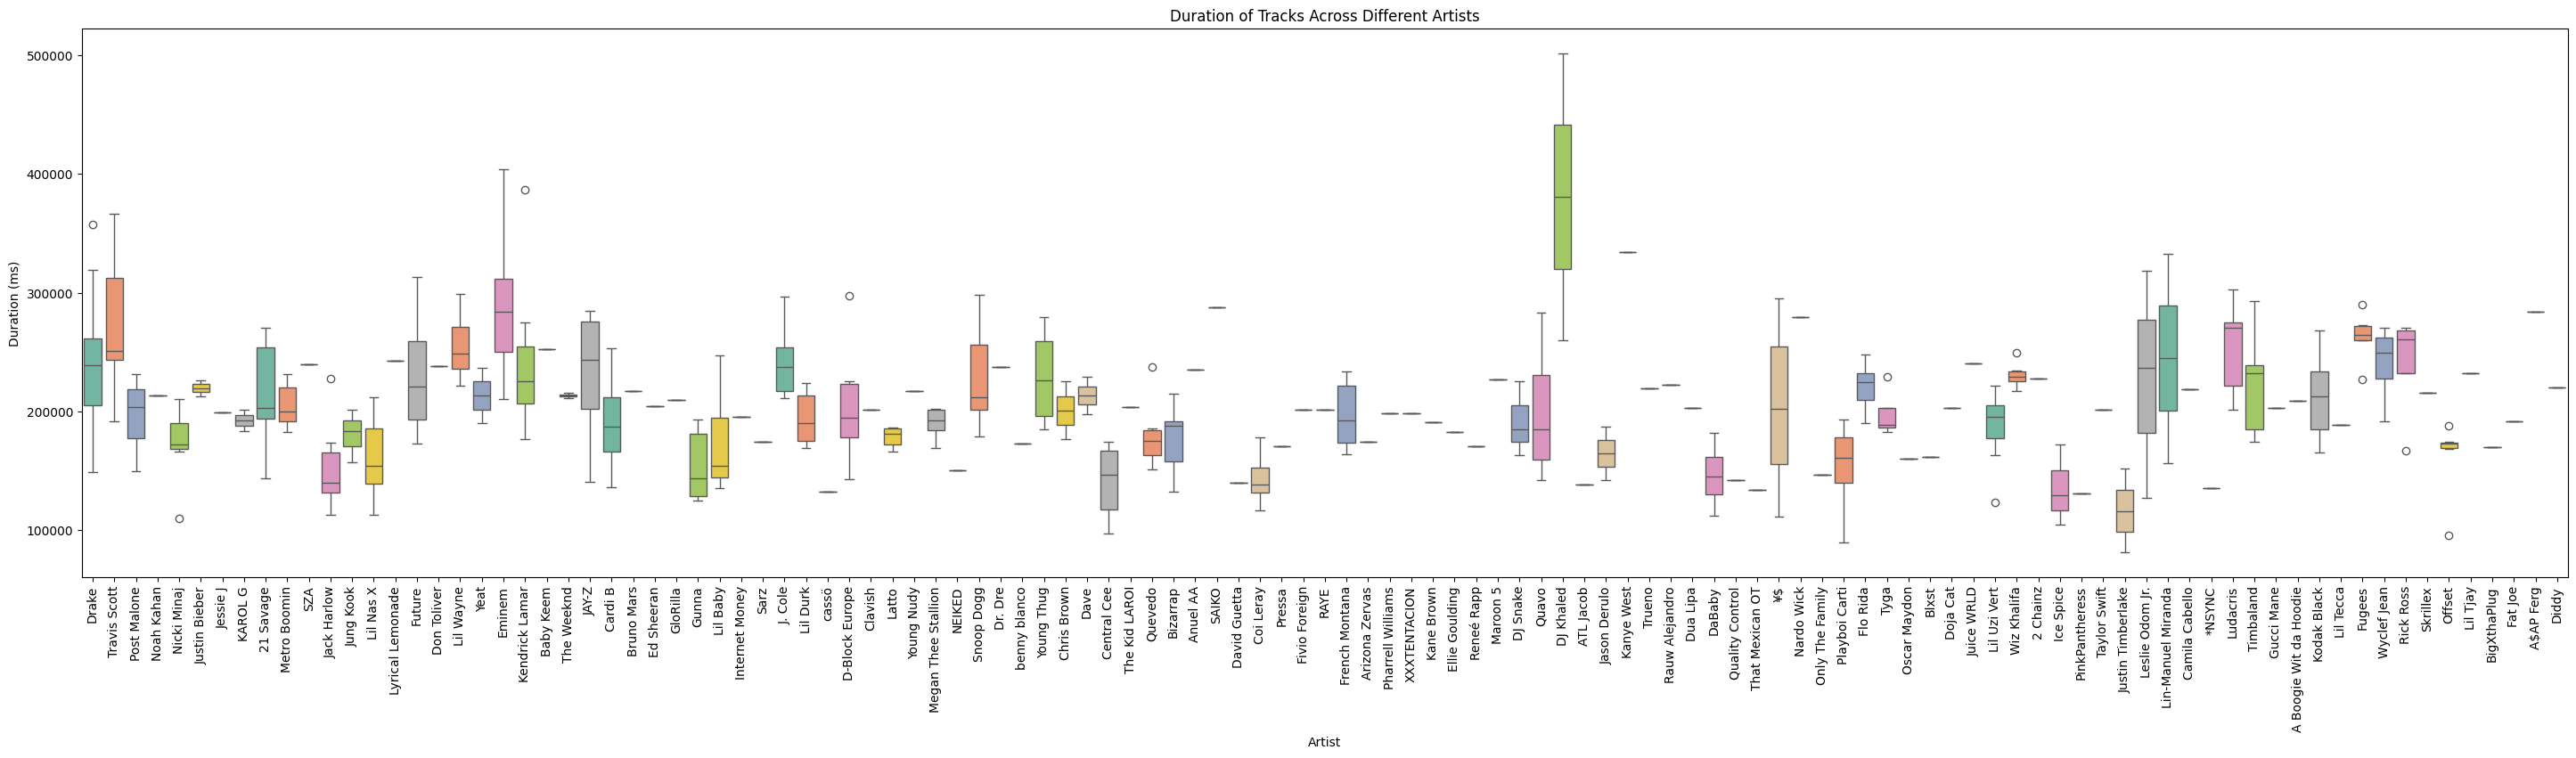

<ipython-input-37-e2382d59e9af>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=spotify_data, x='Artist', y='Popularity', palette='Set2')


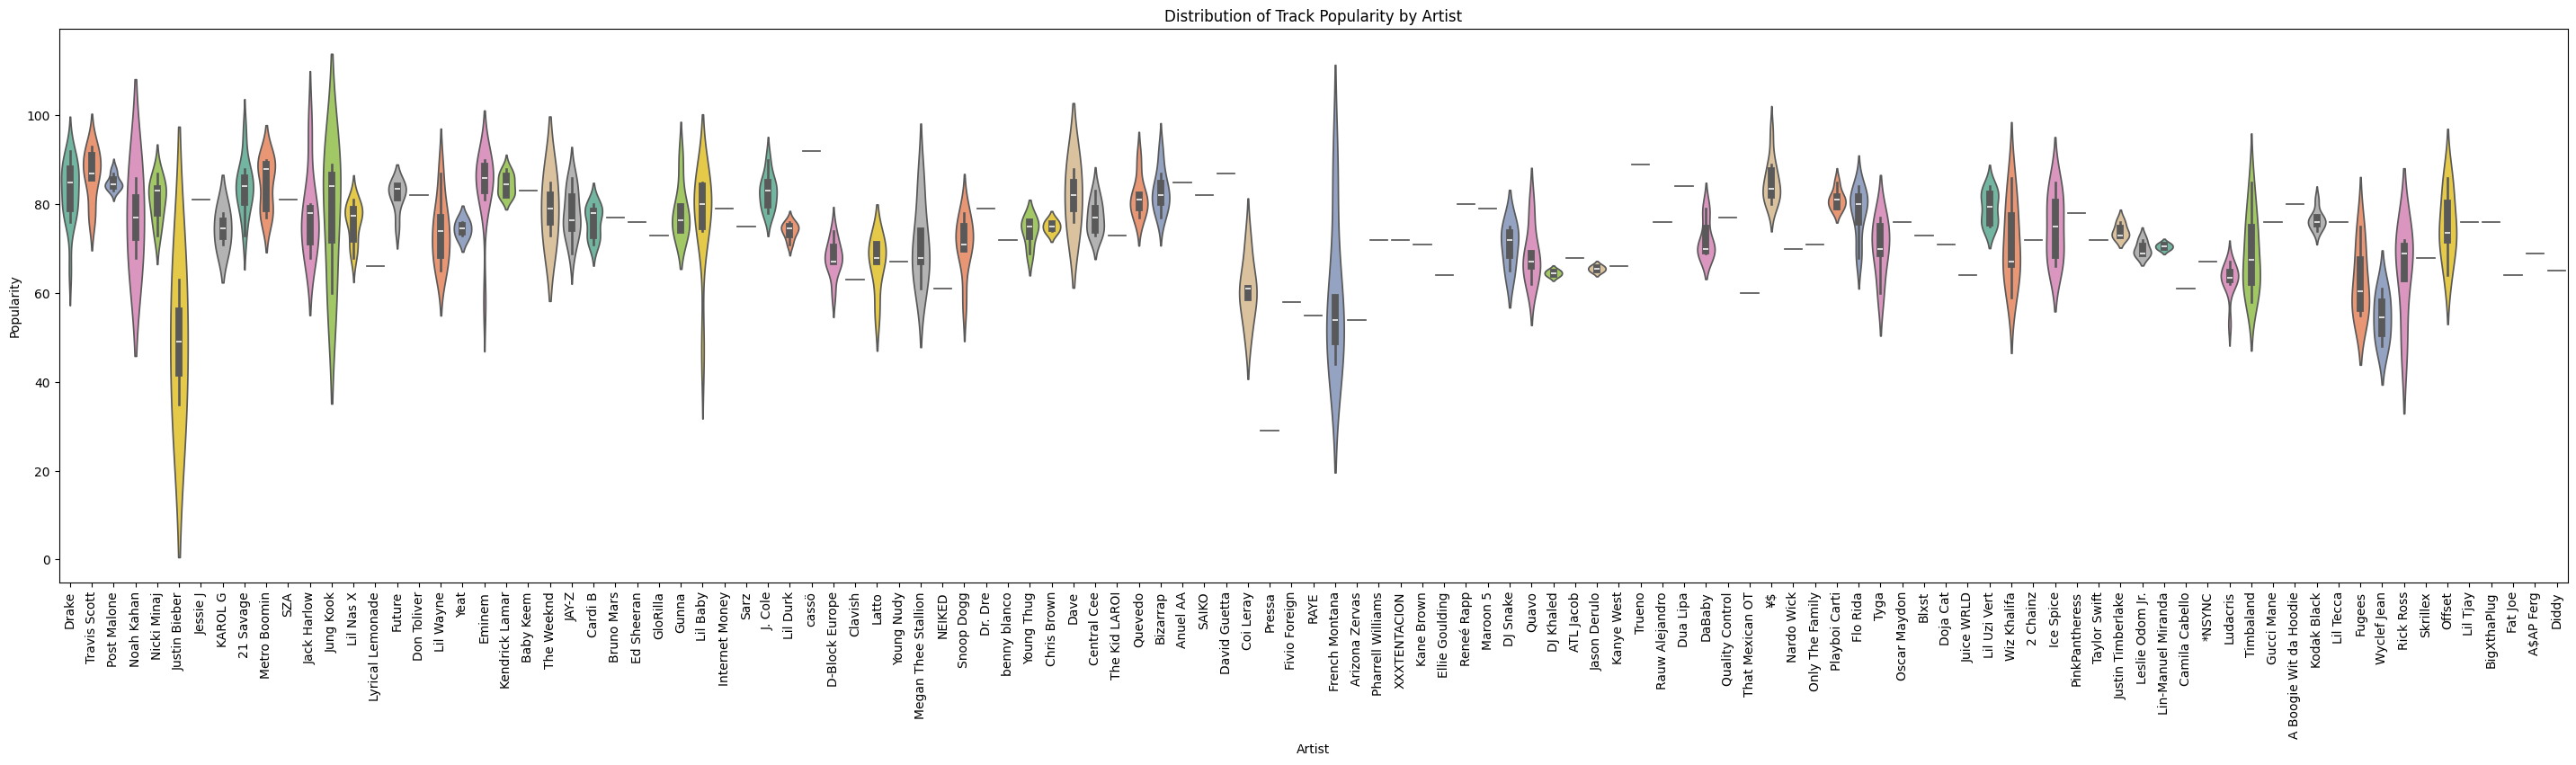

In [37]:
#Load the dataset
file_path='spotify.csv'
spotify_data=pd.read_csv(file_path)

#Display the first few rows of the dataset to understand its structure
spotify_data.info(),spotify_data.head()

#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
print(spotify_data.isnull().sum())
print(spotify_data.duplicated().sum())
print(spotify_data.drop_duplicates(inplace=True))


#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['Popularity'], bins=20, kde=True, color='green')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')


#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=spotify_data, x='Popularity', y='Duration (ms)', alpha=0.7, color='blue')
plt.title('Relationship between Track Popularity and Duration')


#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
print(spotify_data['Artist'].value_counts().head())
plt.figure(figsize=(10, 6))
sns.countplot(data=spotify_data, y='Artist', order=spotify_data['Artist'].value_counts().index[:10])
plt.title('Count of Tracks by Artist')


#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = spotify_data.nsmallest(5, 'Popularity')
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


#6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
top_artists = spotify_data['Artist'].value_counts().nlargest(5).index
top_artist_data = spotify_data[spotify_data['Artist'].isin(top_artists)]
avg_popularity_by_artist = top_artist_data.groupby('Artist')['Popularity'].mean()
print(avg_popularity_by_artist)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_popularity_by_artist.index, y=avg_popularity_by_artist.values, palette="Set2")
plt.title('Average Popularity of Top 5 Most Popular Artists')


#7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
top_5_artists = spotify_data['Artist'].value_counts().nlargest(5).index
top_tracks_by_artist = spotify_data[spotify_data['Artist'].isin(top_5_artists)].groupby('Artist')['Track Name'].apply(list)
print(top_tracks_by_artist)


#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot
sns.pairplot(spotify_data[['Popularity', 'Duration (ms)']])


#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
plt.figure(figsize=(36, 8))
sns.boxplot(data=spotify_data, x='Artist', y='Duration (ms)', palette="Set2")
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()


#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
plt.figure(figsize=(36, 8))
sns.violinplot(data=spotify_data, x='Artist', y='Popularity', palette='Set2')
plt.title('Distribution of Track Popularity by Artist')
plt.xticks(rotation=90)
plt.show()

